In [ ]:
import tensorflow as tf
print(tf.__version__) 

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2025-03-31 14:52:43.046140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-31 14:52:43.074532: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-31 14:52:43.083200: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 14:52:43.117572: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.17.0
Notebook last run (end-to-end): 2025-03-31 14:52:45.571648


I0000 00:00:1743432766.093931    2089 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743432766.206405    2089 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743432766.206453    2089 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743432766.228669    2089 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743432766.228732    2089 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

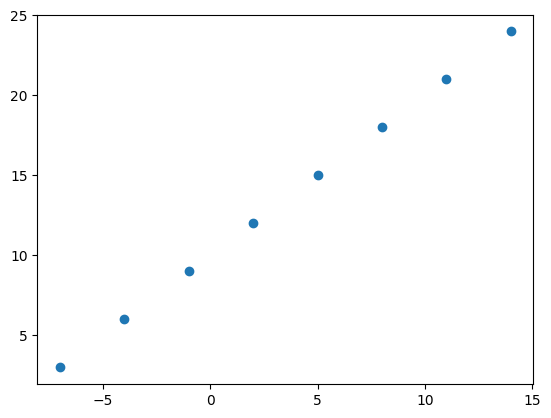

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize data
plt.scatter(X,y)

In [3]:
# X+10
# y == X+10

In [4]:
#Input and output shapes, create demo tensor for housing price prediction
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [6]:
X[0].ndim
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [7]:
##To jakieś dziwne zakomentuje i od razu zrobię tf.constant
#turn numpy to tensor
# X=tf.cast(tf.constant(X),dtype=tf.float32)
# y=tf.cast(tf.constant(y),dtype=tf.float32)
# X,y

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

Modelowanie w tensorflow + ulepszanie


In [9]:
#set random seed
tf.random.set_seed(42)

#Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#Fit model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)


Epoch 1/100


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
I0000 00:00:1743432768.304265    2264 service.cc:146] XLA service 0x7fd802338440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743432768.304357    2264 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 5070, Compute Capability 12.0
2025-03-31 14:52:48.317469: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-31 14:52:49.602813: I external/local_xla/xla/stream_executor/cuda/cuda_dnn

1/1 [==============================] - 3s 3s/step - loss: 9.7553 - mae: 9.7553
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 9.3994 - mae: 9.3994
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0413 - mae: 9.0413
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 8.6809 - mae: 8.6809
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 8.3182 - mae: 8.3182
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 7.9529 - mae: 7.9529
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5850 - mae: 7.5850
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2152 - mae: 7.2152
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8431 - mae: 6.8431
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.4760 - mae: 6.4760
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 6.1098 - mae: 6.1098

In [10]:
#Check out X,y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
#Try and make a prediction using model
x_test = np.array([-7.0])
y_pred=model.predict(x_test)
y_pred



1/1 [==============================] - 0s 52ms/step


array([[3.1332755]], dtype=float32)

In [12]:
#Rebuilding model

#Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Comnpile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 399ms/step - loss: 14.4085 - mae: 14.4085
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.8668 - mae: 13.8668
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3357 - mae: 13.3357
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8085 - mae: 12.8085
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2777 - mae: 12.2777
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7436 - mae: 11.7436
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2028 - mae: 11.2028
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6524 - mae: 10.6524
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0775 - mae: 10.0775
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4731 - mae: 9.4731
Epoch 11/100
1/1 [==============================] - 0s 7ms/

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1/1 [==============================] - 0s 7ms/step - loss: 5.8502 - mae: 5.8502
Epoch 16/100
1/1 [==============================] - 0s 7ms/step - loss: 4.9521 - mae: 4.9521
Epoch 17/100
1/1 [==============================] - 0s 9ms/step - loss: 4.2295 - mae: 4.2295
Epoch 18/100
1/1 [==============================] - 0s 6ms/step - loss: 4.0920 - mae: 4.0920
Epoch 19/100
1/1 [==============================] - 0s 8ms/step - loss: 3.9687 - mae: 3.9687
Epoch 20/100
1/1 [==============================] - 0s 7ms/step - loss: 3.9831 - mae: 3.9831
Epoch 21/100
1/1 [==============================] - 0s 6ms/step - loss: 3.8954 - mae: 3.8954
Epoch 22/100
1/1 [==============================] - 0s 7ms/step - loss: 3.9220 - mae: 3.9220
Epoch 23/100
1/1 [==============================] - 0s 7ms/step - loss: 3.9096 - mae: 3.9096
Epoch 24/100
1/1 [==============================] - 0s 6ms/step - loss: 3.8993 - mae: 3.8993
Epoch 25/100
1/1 [==============================] - 0s 7ms/step - loss: 3.9170 - ma

In [13]:
#Predict
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
#Model prediction
x_test = np.array([17.0])
model.predict(x_test)

1/1 [==============================] - 0s 48ms/step


array([[31.176365]], dtype=float32)

In [15]:
#Another model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#Fit model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 615ms/step - loss: 12.7506 - mae: 12.7506
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.0314 - mae: 12.0314
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3052 - mae: 11.3052
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5696 - mae: 10.5696
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8230 - mae: 9.8230
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0636 - mae: 9.0636


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2895 - mae: 8.2895
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4986 - mae: 7.4986
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8469 - mae: 6.8469
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9121 - mae: 6.9121
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 7.1965 - mae: 7.1965
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3578 - mae: 7.3578
Epoch 13/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4903 - mae: 7.4903
Epoch 14/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4163 - mae: 7.4163
Epoch 15/100
1/1 [==============================] - 0s 7ms/step - loss: 7.1694 - mae: 7.1694
Epoch 16/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9257 - mae: 6.9257
Epoch 17/100
1/1 [==============================] - 0s 8ms/step - loss: 6

In [16]:
x_test = np.array([17.0])
model.predict(x_test)

1/1 [==============================] - 0s 43ms/step


array([[26.183985]], dtype=float32)

In [17]:
#Evaluate model performace

#Bigger dataset
X = tf.range(-100,100,4)
y=tf.range(-90,110,4)
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

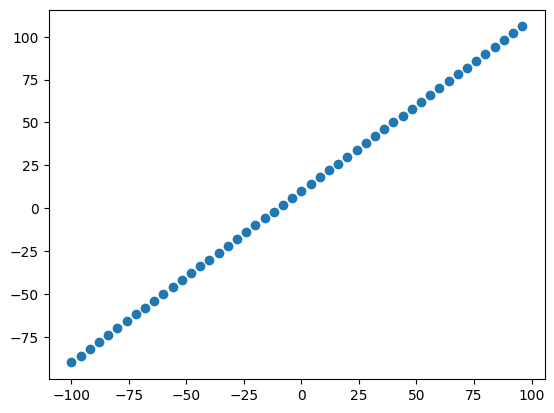

In [18]:
#Visualize data
plt.scatter(X,y)

In [19]:
#Split data into training and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

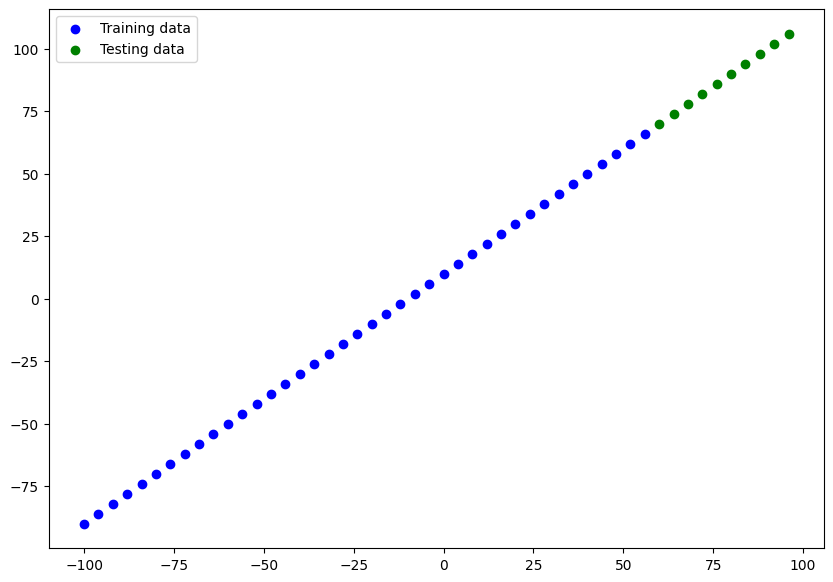

In [20]:
#Visualize data
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [24]:
#Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# #Fit model
# model.fit(X_train, y_train, epochs=100)

In [25]:
# model.summary()

In [26]:
#SEt random seed
tf.random.set_seed(42)

#Create model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1],name="hidden_layer_1"),
    tf.keras.layers.Dense(100, name="hidden_layer_2"),
    tf.keras.layers.Dense(100, name="hidden_layer_3"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#Summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 100)               200       
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               10100     
                                                                 
 hidden_layer_3 (Dense)      (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
#Fit model
model.fit(X_train, y_train, epochs=100, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 100)               200       
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               10100     
                                                                 
 hidden_layer_3 (Dense)      (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


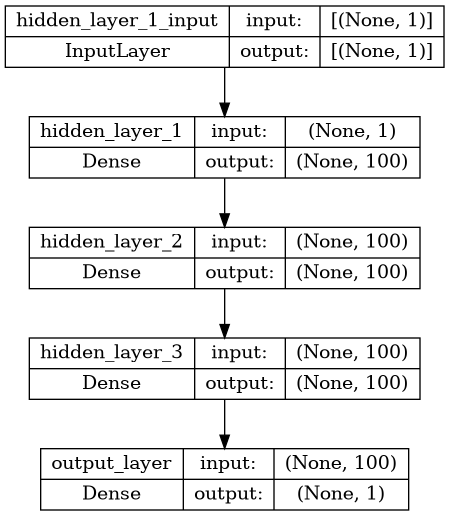

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_layer_names=True, show_shapes=True)


In [30]:
#Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 53ms/step


array([[ 75.95482 ],
       [ 80.31683 ],
       [ 84.69083 ],
       [ 89.073074],
       [ 93.446815],
       [ 97.81452 ],
       [102.188805],
       [106.553986],
       [110.9387  ],
       [115.30804 ]], dtype=float32)

In [31]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    # Show the legend
    plt.legend()

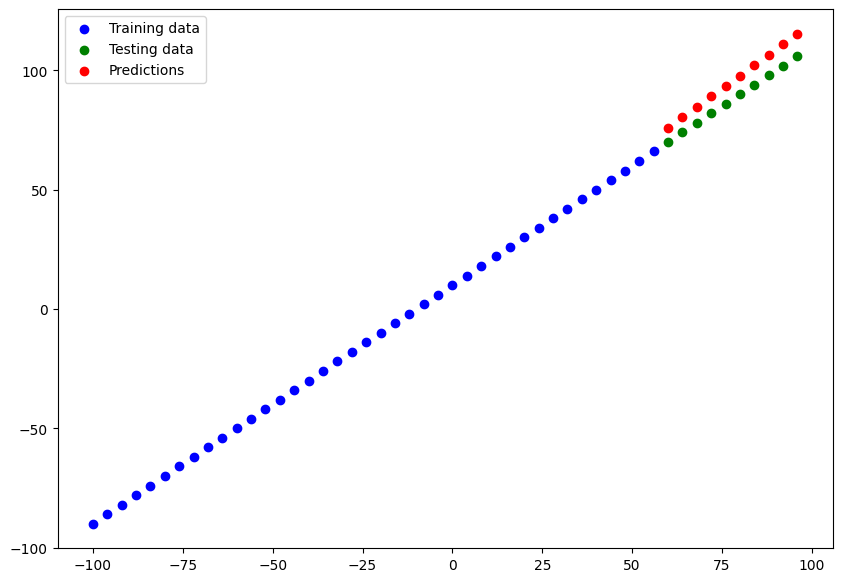

In [33]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [34]:
#Evaluate model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 118ms/step - loss: 7.6286 - mae: 7.6286


[7.628641605377197, 7.628641605377197]

In [35]:
mae = tf.metrics.mae(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.627109 , 11.473267 , 10.261835 , 10.       , 10.6893635,
       12.325809 , 14.951044 , 18.553986 , 22.938698 , 27.308039 ],
      dtype=float32)>

In [36]:
y_test, y_preds

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 75.95482 ],
        [ 80.31683 ],
        [ 84.69083 ],
        [ 89.073074],
        [ 93.446815],
        [ 97.81452 ],
        [102.188805],
        [106.553986],
        [110.9387  ],
        [115.30804 ]], dtype=float32))

In [37]:
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 1))

In [38]:
y_preds.squeeze().shape

(10,)

In [39]:
mse = tf.metrics.mse(y_true=y_test,
                    y_pred=y_preds.squeeze())
mae = tf.metrics.mae(y_true=y_test,
                    y_pred=y_preds.squeeze())
mae,mse

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

(<tf.Tensor: shape=(), dtype=float32, numpy=7.6286416>,
 <tf.Tensor: shape=(), dtype=float32, numpy=59.344666>)

In [40]:
def mae(y_test, y_preds):
    return tf.metrics.mae(y_true = y_test,
                          y_pred = y_preds.squeeze())
def mse(y_test, y_preds):
    return tf.metrics.mse(y_true = y_test,
                          y_pred = y_preds.squeeze())

RUNNING EXPERIMENTS TO IMPROVE MODEL

In [41]:
#Model 1

#set random seed
tf.random.set_seed(42)

#Replicate model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])    

#Fit model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1/1 [==============================] - 0s 26ms/step


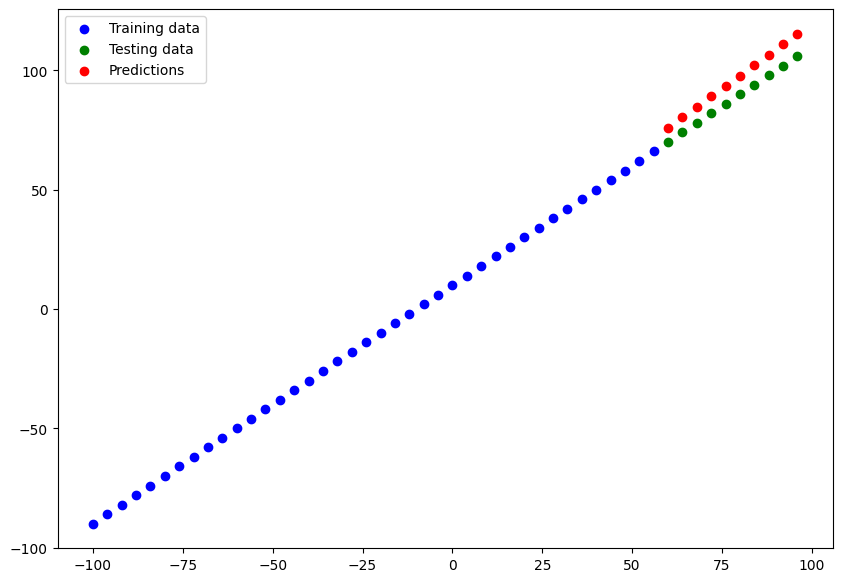

In [42]:
#prediction for model1
preds_1 = model.predict(X_test)
plot_predictions(predictions=preds_1)

In [43]:
#Calculate model metrics
mae_1 = mae(y_test, preds_1.squeeze()).numpy()
mse_1 = mse(y_test, preds_1.squeeze()).numpy()
mae_1, mse_1

(7.6286416, 59.344666)

In [44]:
#Build model 2

#set random seed
tf.random.set_seed(42)

#Replicate model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])  

#compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit model
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1/1 [==============================] - 0s 43ms/step


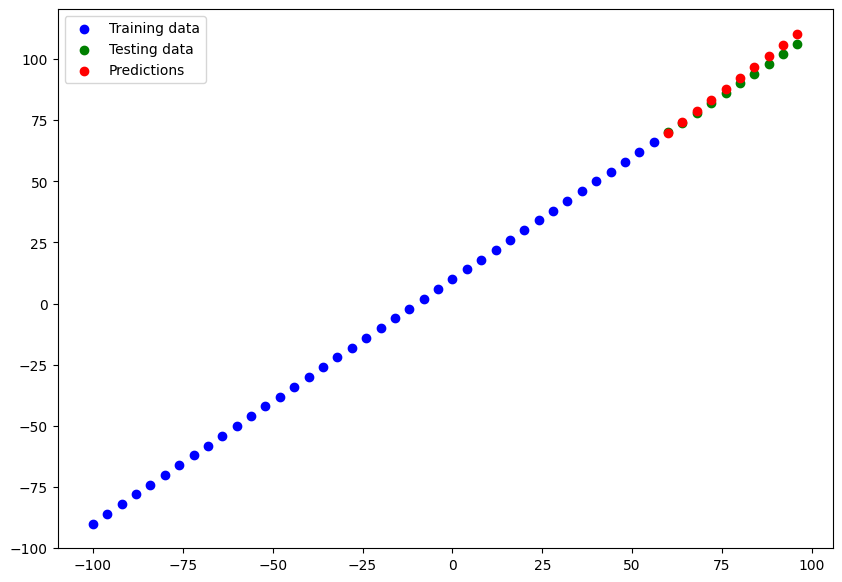

In [45]:
preds_2 = model_2.predict(X_test)
plot_predictions(predictions=preds_2)

In [46]:
mse_2=mse(y_test, preds_2).numpy()
mae_2=mae(y_test, preds_2).numpy()
mse_2, mae_2

(6.087023, 2.0334878)

In [47]:
#Build model 3

#set random seed
tf.random.set_seed(42)

#Replicate model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit model
model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=500, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1/1 [==============================] - 0s 38ms/step


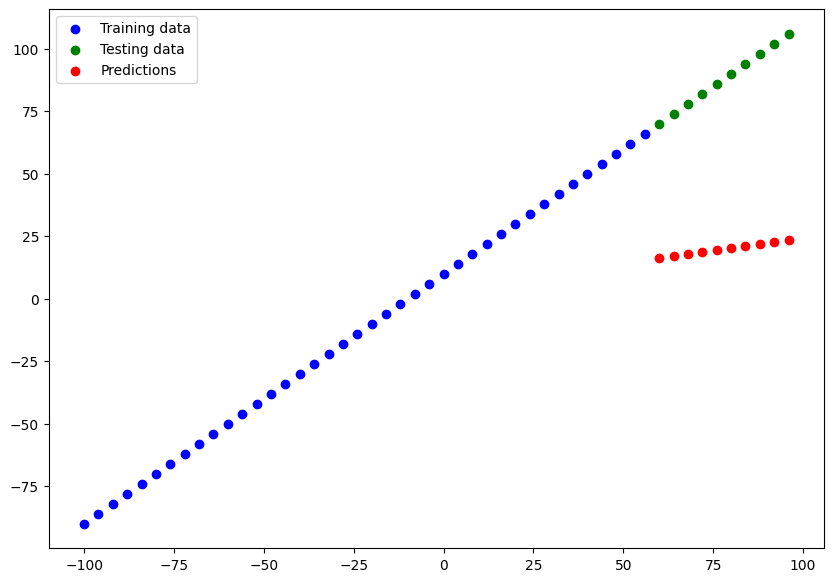

In [48]:
preds_3 = model_3.predict(X_test)
plot_predictions(predictions=preds_3)

In [49]:
mae_3 = mae(y_test, preds_3).numpy()
mse_3 = mse(y_test, preds_3).numpy()
mae_3, mse_3

(68.05623, 4716.462)

Comparing results

In [50]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
import pandas as pd 
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,7.628642,59.344666
1,model_2,2.033488,6.087023
2,model_3,68.056229,4716.461914


In [51]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


SAVE MODEL

In [54]:
#Save the best performing model
model_3.save('saved_model/best_model.keras')

Loading model

In [57]:
#Load a model from file
loaded_saved_model = tf.keras.models.load_model("saved_model/best_model.keras") 
loaded_saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
#compare model 3 predictions with saved model predictions
preds_3 = model_3.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds).numpy() == mae(y_test, preds_3).numpy()

1/1 [==============================] - 0s 37ms/step


True

Larger Example

In [59]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [61]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [63]:
#Create X,y
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head(),y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) #reporoducibility
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [67]:
#set random seed
tf.random.set_seed(42)

#Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])    

#fit model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8693.1484 - mae: 8693.1484
Epoch 2/100
 1/34 [..............................] - ETA: 0s - loss: 9037.5566 - mae: 9037.5566

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


34/34 [==============================] - 0s 4ms/step - loss: 7865.4111 - mae: 7865.4111
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7530.1304 - mae: 7530.1304
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7706.2891 - mae: 7706.2891
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7716.2896 - mae: 7716.2896
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7661.0225 - mae: 7661.0225
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7561.1533 - mae: 7561.1533
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7689.0371 - mae: 7689.0371
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7465.1812 - mae: 7465.1812
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7651.3857 - mae: 7651.3857
Epoch 11/100
34/34 [==============================] - 0s 4ms/step - loss: 7497.9790 - mae: 7497.9790
Epoch 12/1

In [68]:
#chceck the results
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7147.2715 - mae: 7147.2715


[7147.271484375, 7147.271484375]

Lets try a bigger model

In [69]:
#set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Create model with extra layer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1) #1 output neuron
])

#Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics=["mae"])

#fit model
history = insurance_model_2.fit(X_train, y_train, epochs=200, callbacks=[callback], verbose=0)
# history_2 = insurance_model_2.fit(X_train, y_train, epochs=200, callbacks=[callback], verbose=0)


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

In [70]:
#evaluate model
insurance_model_2.evaluate(X_test, y_test)
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 6470.2856 - mae: 6470.2856


(6470.28564453125, 6470.28564453125)

Text(0.5, 0, 'epochs')

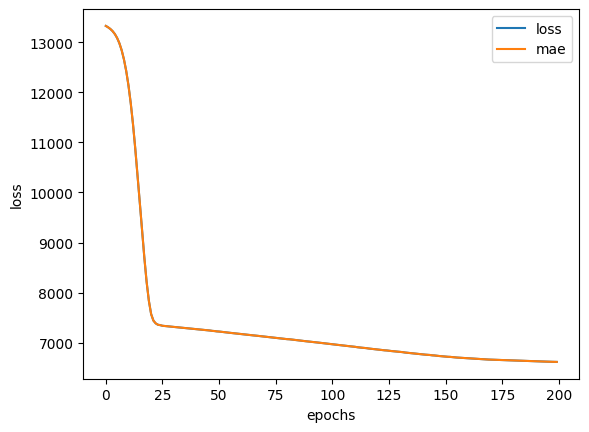

In [71]:
#Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [74]:
#comparing 1st laer neurons
#set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Create model with extra layer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) #1 output neuron
])

#Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

#fit model
history2 = insurance_model_2.fit(X_train, y_train, epochs=200, callbacks=[callback], verbose=0)

#Create model with extra layer
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1) #1 output neuron
])

#Compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])

#fit model
history3 = insurance_model_3.fit(X_train, y_train, epochs=100, callbacks=[callback], verbose=0)


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

In [75]:
mae_2 = mae(y_test, insurance_model_2.predict(X_test)).numpy()
mse_2 = mse(y_test, insurance_model_2.predict(X_test)).numpy()
mse_3 = mse(y_test, insurance_model_3.predict(X_test)).numpy()  
mae_3 = mae(y_test, insurance_model_3.predict(X_test)).numpy()

model_results = [["10 neurons", mae_2, mse_2],
                 ["100 neurons", mae_3, mse_3]]
import pandas as pd 
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

9/9 [==============================] - 0s 2ms/step


,model,mae,mse
0,10 neurons,3594.368652,50025840.0
1,100 neurons,3426.867188,38891764.0


Text(0.5, 0, 'epochs')

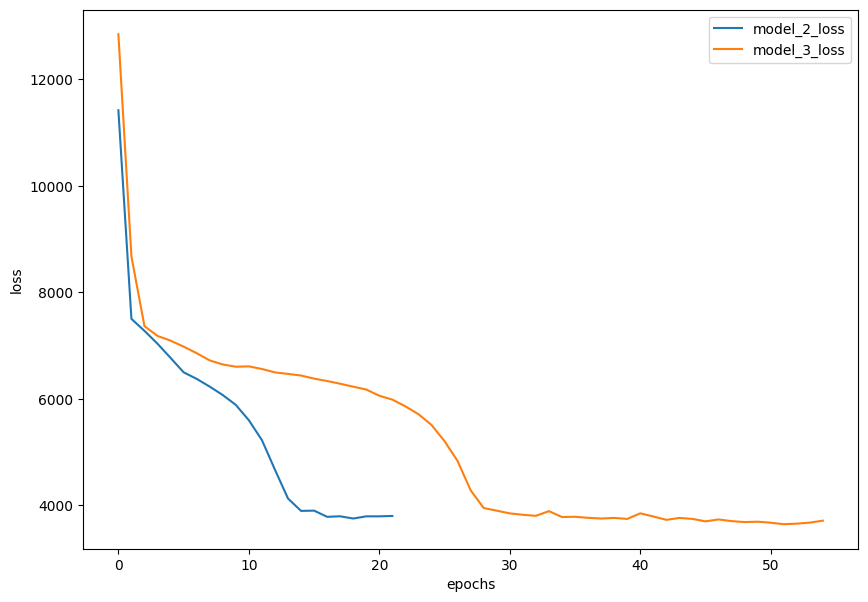

In [76]:
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.plot(df2["loss"], label="model_2_loss")
plt.plot(df3["loss"], label="model_3_loss")
# Show the legend
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

Preprocessing Data

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [78]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [80]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [81]:
#normalized and one-hot encoded data example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [82]:
#What about shapes?
X_train_normal.shape, X_train.shape 

((1070, 11), (1070, 6))

In [83]:
#Model normalized data

#Set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=['mae'])

#Fit the model for 200 epochs
history_4 = insurance_model_4.fit(X_train_normal, y_train, epochs=200, callbacks=[callback], verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

Text(0.5, 0, 'epochs')

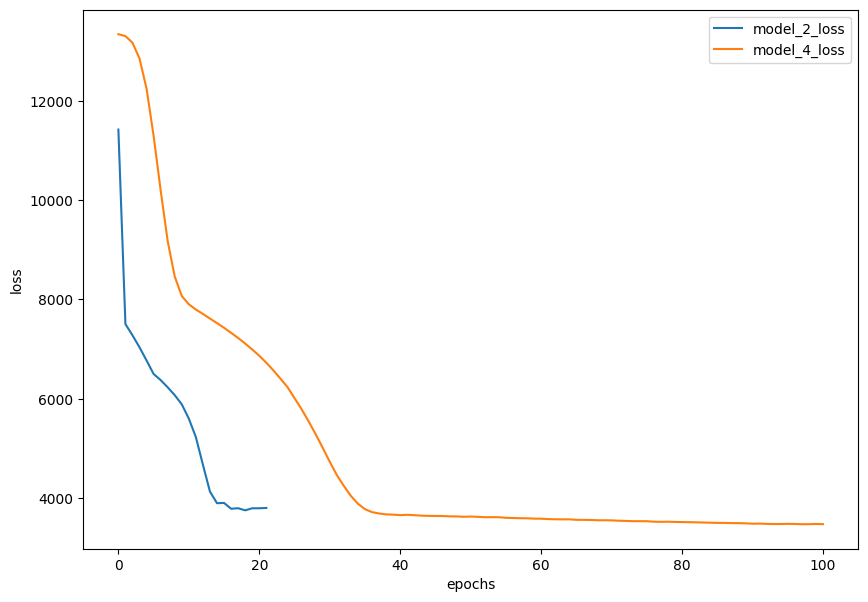

In [84]:
df2 = pd.DataFrame(history2.history)
df4 = pd.DataFrame(history_4.history)
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.plot(df2["loss"], label="model_2_loss")
plt.plot(df4["loss"], label="model_4_loss")
# Show the legend
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

In [85]:
# Evaulate 3rd model
insurance_model_4_loss, insurance_model_4_mae = insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3165.8262 - mae: 3165.8262


In [86]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_4_mae

(6470.28564453125, 3165.826171875)

In [87]:
#Model normalized data

#Set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Build the model
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=['mae'])

#Fit the model for 200 epochs
history_5 = insurance_model_5.fit(X_train_normal, y_train, epochs=200, callbacks=[callback], verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

Text(0.5, 0, 'epochs')

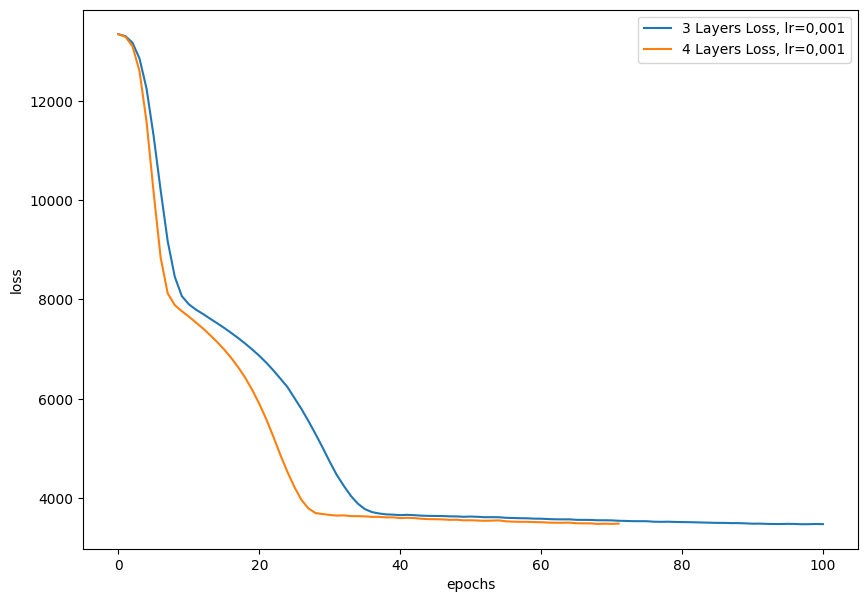

In [88]:
df4 = pd.DataFrame(history_4.history)
df5 = pd.DataFrame(history_5.history)
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.plot(df4["loss"], label="3 Layers Loss, lr=0,001")
plt.plot(df5["loss"], label="4 Layers Loss, lr=0,001")
# Show the legend
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

In [89]:
# Evaulate 5rd model
insurance_model_5_loss, insurance_model_5_mae = insurance_model_5.evaluate(X_test_normal, y_test)
insurance_model_5_loss, insurance_model_5_mae, insurance_model_4_loss, insurance_model_4_mae

9/9 [==============================] - 0s 3ms/step - loss: 3166.8071 - mae: 3166.8071


(3166.80712890625, 3166.80712890625, 3165.826171875, 3165.826171875)

Preprocessing data

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [91]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
